In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
import os 
import pandas as pd
from scipy import stats
from scipy.interpolate import UnivariateSpline
from matplotlib import cm
from statistics import mode

In [2]:
save_plot = True

plot_dir = 'plots/01/'
os.system('mkdir -p {}'.format(plot_dir))

0

In [3]:
# os.system('module load texlive') # load latex on vollmond

In [4]:
from matplotlib import rc

rc('text', usetex=True)
rc('mathtext', fontset='custom')
rc('text.latex', preamble=r'\usepackage{newtxtext}\usepackage{newtxmath}')

In [5]:
mpl.rcParams.update({
    "text.usetex": True,
    "font.size": 12,
    "font.family": "serif",
#     "font.serif": "Times",
    'axes.labelsize': 12,
    "legend.fontsize":11,
    # "font.sans-serif": ["Helvetica"],
#     'text.latex.preview': True,
#    'text.latex.preamble': [r"""\usepackage{libertine}\usepackage[libertine]{newtxmath}"""],
})


# 1 PeV -> 1 TeV e_cut = 500 MeV

In [6]:
path = 'data/total_defl_moliere_1PeV_1TeV_ecut500/'

df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [1, 2, 3, 4, 5]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

In [7]:
labels = [
    'G4+MSM',
    'vG+MSM',
    'MSM only',
    'vG',
    'G4'
]

0.05422583311479834 0.0031476075062441045 0.3318123795819229
1000000
0.056924994259316186 0.0041455935053566146 0.336226662325901
1000000
0.04791964860283263 0.0011619956099765232 0.21330830206392914
1000000
0.02240292810903681 0.0017530395201151951 0.2568327676636854
1000000
0.01655292547477602 0.0011750863743712613 0.24395665005071537
1000000


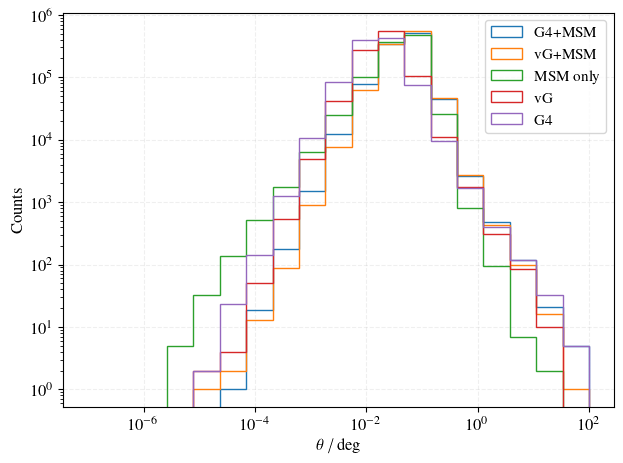

In [8]:
bins = np.logspace(-7, 2, 20)
for i, df in enumerate(df_dict.keys()):
    print(df_dict[df].deflection.median(), np.quantile(df_dict[df].deflection, 0.005), np.quantile(df_dict[df].deflection, 0.995))
    plt.hist(df_dict[df].deflection, bins=bins, histtype='step', label=labels[i])
    print(len(df_dict[df].deflection))

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$deg')
plt.ylabel('Counts')
plt.legend()
plt.grid(alpha=0.2, linestyle='--')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_1TeV_ecut500.pdf', bbox_inches='tight')

0.06030482530665722 0.00461452747354896 0.2530473203943149
344625
0.06085518964076452 0.004733740851098484 0.23914180749494623
345113
0.05674825122749541 0.004253612503477905 0.23079032557016005
344180
0.02028783278499148 0.0016138247531639674 0.06855442607008203
344420
0.01587824450212311 0.0012089336006147703 0.11300165146021149
344823


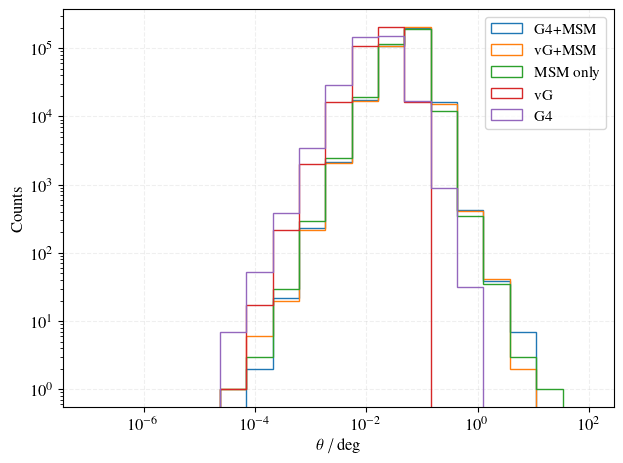

In [9]:
bins = np.logspace(-7, 2, 20)
for i, df in enumerate(df_dict.keys()):
    print(df_dict[df].deflection[df_dict[df].E_f == mode(df_dict[df].E_f)].median(), np.quantile(df_dict[df].deflection[df_dict[df].E_f == mode(df_dict[df].E_f)], 0.005), np.quantile(df_dict[df].deflection[df_dict[df].E_f == mode(df_dict[df].E_f)], 0.995))
    plt.hist(df_dict[df].deflection[df_dict[df].E_f == mode(df_dict[df].E_f)], bins=bins, histtype='step', label=labels[i])
    print(len(df_dict[df].deflection[df_dict[df].E_f == mode(df_dict[df].E_f)]))

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$deg')
plt.ylabel('Counts')
plt.legend()
plt.grid(alpha=0.2, linestyle='--')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_1TeV_ecut500_cut_on_E_f.pdf', bbox_inches='tight')

# 1 PeV -> 1 TeV v_cut = 0.05

In [10]:
path = 'data/total_defl_moliere_1PeV_1TeV_vcut0_05/'

df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [6, 7, 8, 99, 10]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

0.04177452091888634 0.0026878491104417087 0.30071662769131663
1000000
0.044669762040853225 0.0034476974422568366 0.3077045684363296
1000000
0.03763968721226911 0.0009318084127136885 0.16542781690287817
1000000
0.012994995712527819 0.000529179829399059 0.2577510169602145
1000000
0.0068362621409276 0.00021209875136364838 0.24563060366093142
1000000


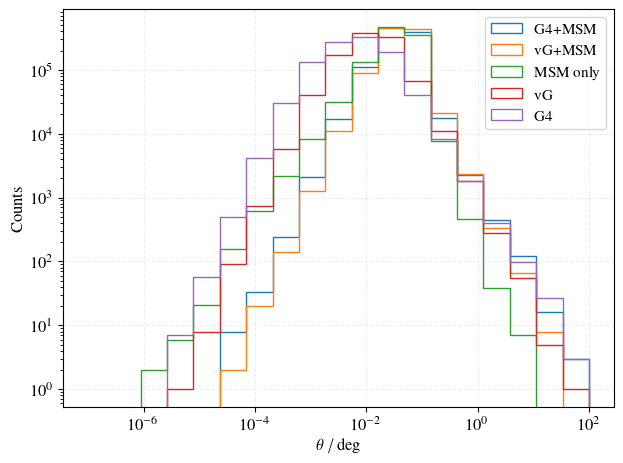

In [11]:
bins = np.logspace(-7, 2, 20)
for i, df in enumerate(df_dict.keys()):
    print(df_dict[df].deflection.median(), np.quantile(df_dict[df].deflection, 0.005), np.quantile(df_dict[df].deflection, 0.995))
    plt.hist(df_dict[df].deflection, bins=bins, histtype='step', label=labels[i])
    print(len(df_dict[df].deflection))

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$deg')
plt.ylabel('Counts')
plt.legend()
plt.grid(alpha=0.2, linestyle='--')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_1TeV_vcut0_05.pdf', bbox_inches='tight')

0.045414989644277884 0.003706780873573703 0.19586346024914267
594459
0.04626982804891535 0.0037798119922806497 0.1810684237716505
593294
0.044203624418042486 0.003471020552597664 0.17878579451029555
594104
0.009649117864049952 0.00042719383948985483 0.05339534342505433
594360
0.0045980482869114065 0.0001700382506960849 0.078913449669699
593644


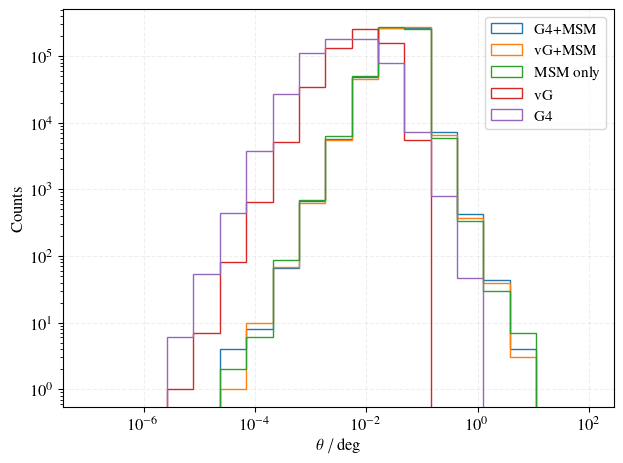

In [12]:
bins = np.logspace(-7, 2, 20)
for i, df in enumerate(df_dict.keys()):
    print(df_dict[df].deflection[df_dict[df].E_f == mode(df_dict[df].E_f)].median(), np.quantile(df_dict[df].deflection[df_dict[df].E_f == mode(df_dict[df].E_f)], 0.005), np.quantile(df_dict[df].deflection[df_dict[df].E_f == mode(df_dict[df].E_f)], 0.995))
    plt.hist(df_dict[df].deflection[df_dict[df].E_f == mode(df_dict[df].E_f)], bins=bins, histtype='step', label=labels[i])
    print(len(df_dict[df].deflection[df_dict[df].E_f == mode(df_dict[df].E_f)]))

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$deg')
plt.ylabel('Counts')
plt.legend()
plt.grid(alpha=0.2, linestyle='--')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_1TeV_vcut0_005_cut_on_E_f.pdf', bbox_inches='tight')

# 1 PeV continuous E_f

In [51]:
path = 'data/total_defl_moliere_1PeV_continuous_E_f/'

df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [11, 12]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

Text(0, 0.5, 'Counts')

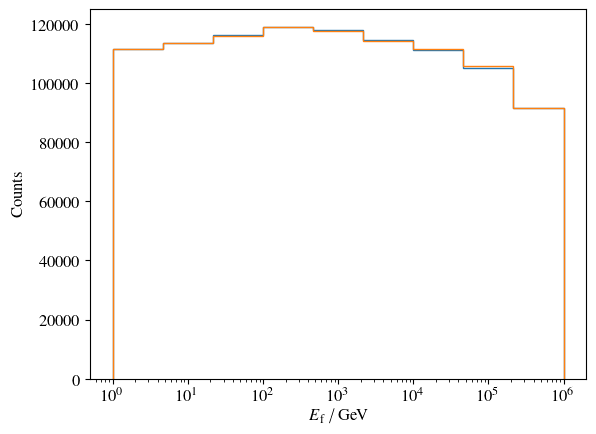

In [52]:
bins = np.logspace(0, 6, 10)
for i, df in enumerate(df_dict.keys()):
    plt.hist(df_dict[df].E_f, bins=bins, histtype='step')

plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel('Counts')

0.036119270109562944 8.146696321197106e-05 3.1369569770821295
0.047814973840642164 9.94820335224587e-05 2.986413733552508


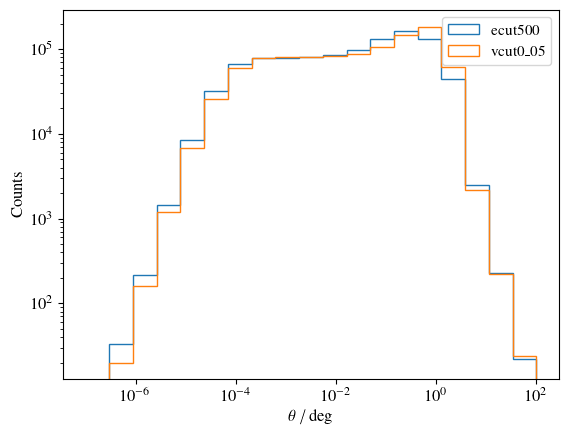

In [53]:
bins = np.logspace(-7, 2, 20)
labels = ['ecut500', 'vcut0_05']
for i, df in enumerate(df_dict.keys()):
    print(df_dict[df].deflection.median(), np.quantile(df_dict[df].deflection, 0.05), np.quantile(df_dict[df].deflection, 0.995))
    plt.hist(df_dict[df].deflection, bins=bins, histtype='step', label=labels[i])

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$deg')
plt.ylabel('Counts')
plt.legend()

In [54]:
def paper_medians(x):
    return np.power(10, 0.0176 * x**3 + -0.2328 * x**2 + 0.0929 * x + 0.0726)

In [55]:
def lower_int(x, level=0.99):
    return np.quantile(x, (1-level)/2)

def upper_int(x, level=0.99):
    return np.quantile(x, level + (1-level)/2)

[1.04727977e+00 8.16577145e-01 6.16600748e-01 4.48304706e-01
 3.24013497e-01 2.29945732e-01 1.57833306e-01 1.02214452e-01
 6.17331634e-02 3.46540176e-02 1.77445696e-02 8.89492678e-03
 4.36846062e-03 2.09498900e-03 1.03893519e-03 5.14040515e-04
 2.64657437e-04 1.37133696e-04 5.83602844e-05]
[4.80596917e-02 3.92085271e-02 3.67121425e-02 2.90524678e-02
 2.13731030e-02 1.66277056e-02 1.03508856e-02 6.02384532e-03
 2.85198838e-03 1.44607336e-03 6.40970663e-04 3.06657374e-04
 1.54009141e-04 7.62407363e-05 3.92672623e-05 2.17783318e-05
 1.19528310e-05 7.44302609e-06 2.41483654e-06]


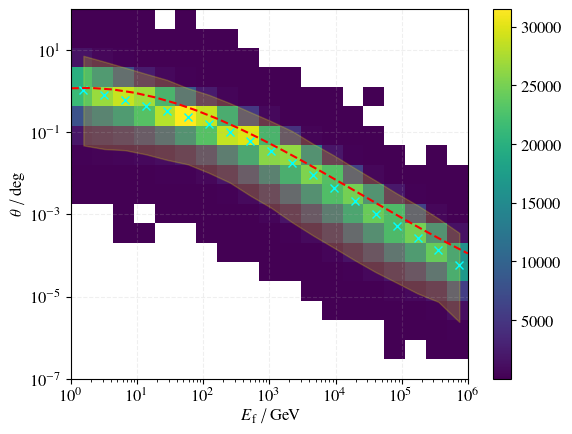

In [56]:
df = 'df_11'
bins = (np.logspace(0, 6, 20), np.logspace(-7, 2, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1)

bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]

ret_median = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, 'x', color='cyan')
print(ret_median.statistic)

ret_lower = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.b')
ret_upper = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.b')
plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.2, color='yellow')
print(ret_lower.statistic)

plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel(r'$\theta\,/\,$deg')
plt.colorbar()
plt.grid(alpha=0.2, linestyle='--')

[1.07309406e+00 1.00500908e+00 8.83062436e-01 7.14353852e-01
 5.34242320e-01 3.73251670e-01 2.44462103e-01 1.47882284e-01
 8.37267354e-02 4.44301218e-02 2.25665996e-02 1.10566513e-02
 5.38760268e-03 2.59677104e-03 1.26013708e-03 6.39401794e-04
 3.32197500e-04 1.74401946e-04 7.21729158e-05]
[8.18488478e-02 8.18847047e-02 7.17599955e-02 5.76730298e-02
 4.08997943e-02 2.69975597e-02 1.32208276e-02 6.47080211e-03
 3.09460727e-03 1.58636765e-03 7.89026818e-04 3.62629006e-04
 1.79177753e-04 8.92150652e-05 4.37186203e-05 2.51537423e-05
 1.41727654e-05 7.96347042e-06 2.95755867e-06]


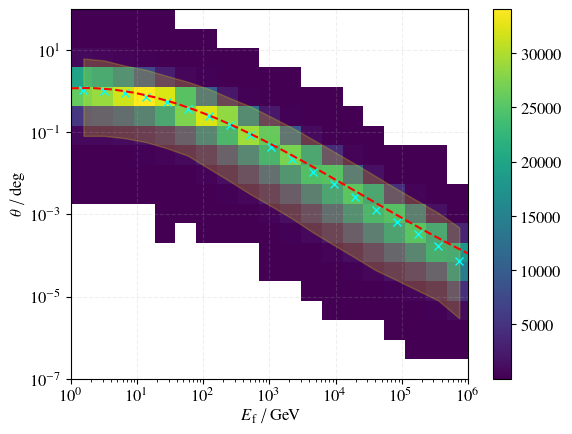

In [57]:
df = 'df_12'
bins = (np.logspace(0, 6, 20), np.logspace(-7, 2, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1)

bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]

ret_median = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, 'x', color='cyan')
print(ret_median.statistic)

ret_lower = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.b')
ret_upper = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.b')
plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.2, color='yellow')
print(ret_lower.statistic)

plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel(r'$\theta\,/\,$deg')
plt.colorbar()
plt.grid(alpha=0.2, linestyle='--')

2839.2322746640043
8149.393619031057
13506.44430089527
17285.25530836737
18506.470769946427
18691.740604882394


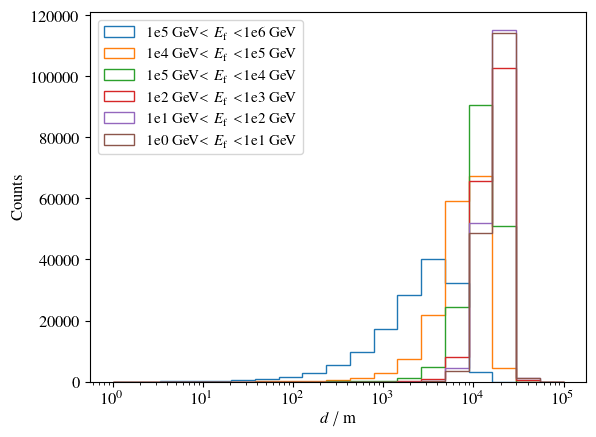

In [58]:
df = 'df_12'
bins = np.logspace(0, 5, 20)
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e6) & (df_dict[df].E_f > 1e5)], bins=bins, histtype='step', label=r'1e5 GeV$< E_{\mathrm{f}} < $1e6 GeV')
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e5) & (df_dict[df].E_f > 1e4)], bins=bins, histtype='step', label=r'1e4 GeV$< E_{\mathrm{f}} < $1e5 GeV')
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e4) & (df_dict[df].E_f > 1e3)], bins=bins, histtype='step', label=r'1e5 GeV$< E_{\mathrm{f}} < $1e4 GeV')
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e3) & (df_dict[df].E_f > 1e2)], bins=bins, histtype='step', label=r'1e2 GeV$< E_{\mathrm{f}} < $1e3 GeV')
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e2) & (df_dict[df].E_f > 1e1)], bins=bins, histtype='step', label=r'1e1 GeV$< E_{\mathrm{f}} < $1e2 GeV')
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e1) & (df_dict[df].E_f > 1e0)], bins=bins, histtype='step', label=r'1e0 GeV$< E_{\mathrm{f}} < $1e1 GeV')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$d\,/\,$m')
plt.ylabel('Counts')
plt.legend()


print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e6) & (df_dict[df].E_f > 1e5)]))
print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e5) & (df_dict[df].E_f > 1e4)]))
print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e4) & (df_dict[df].E_f > 1e3)]))
print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e3) & (df_dict[df].E_f > 1e2)]))
print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e2) & (df_dict[df].E_f > 1e1)]))
print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e1) & (df_dict[df].E_f > 1e0)]))

Text(0, 0.5, '$y_{\\mathrm{f}}\\,/\\,$cm')

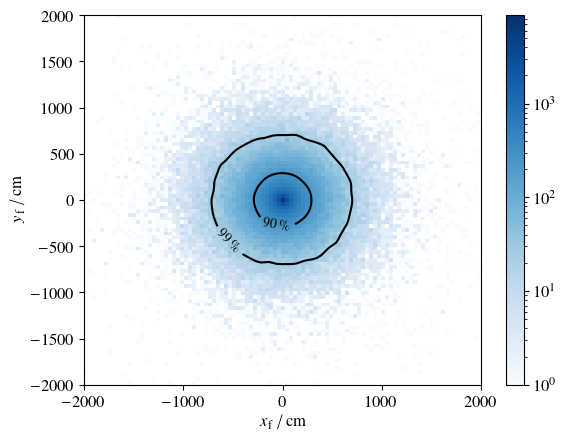

In [59]:
df = 'df_12'
bins = (np.linspace(-2000, 2000, 100), np.linspace(-2000, 2000, 100))
x = df_dict[df].x_f[(df_dict[df].E_f < 1e3) & (df_dict[df].E_f > 1e2)]
y = df_dict[df].y_f[(df_dict[df].E_f < 1e3) & (df_dict[df].E_f > 1e2)]
counts, xedges, yedges, image = plt.hist2d(x, y, bins=bins, cmin=1, cmap='Blues', norm=LogNorm())
plt.colorbar()


xx, yy = np.mgrid[bins[0].min():bins[0].max():complex(len(bins[0])), bins[1].min():bins[1].max():complex(len(bins[1]))]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

z = (f.max() - f) / (f.max() - f.min())
contour = plt.contour(xx, yy, z, [0.9, 0.99], colors='black')
plt.clabel(contour, fontsize=10, colors='black', fmt={0.9: '90\,\%', 0.99: '99\,\%'})


plt.xlabel(r'$x_{\mathrm{f}}\,/\,$cm')
plt.ylabel(r'$y_{\mathrm{f}}\,/\,$cm')

In [60]:
# Define the number of colors and create the color gradient
num_colors = 6
Colors = plt.cm.inferno(np.linspace(0, 1, num_colors))
# Colors = plt.cm.viridis(np.linspace(0, 1, num_colors))

colors = []

# Print the HTML hex color strings
html_hex_colors = [mpl.colors.rgb2hex(color) for color in Colors]
for color in html_hex_colors:
    # print(color)
    colors.append(color)
colors

['#000004', '#420a68', '#932667', '#dd513a', '#fca50a', '#fcffa4']

Text(0, 0.5, '$y_{\\mathrm{f}}\\,/\\,$cm')

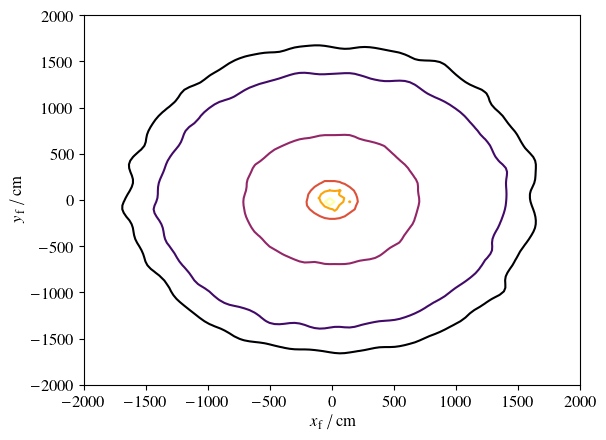

In [23]:
df = 'df_12'
e_f_mins = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]

for i in range(len(e_f_mins)-1):
    bins = (np.linspace(-2000, 2000, 100), np.linspace(-2000, 2000, 100))
    x = df_dict[df].x_f[(df_dict[df].E_f < e_f_mins[i+1]) & (df_dict[df].E_f > e_f_mins[i])]
    y = df_dict[df].y_f[(df_dict[df].E_f < e_f_mins[i+1]) & (df_dict[df].E_f > e_f_mins[i])]


    xx, yy = np.mgrid[bins[0].min():bins[0].max():complex(len(bins[0])), bins[1].min():bins[1].max():complex(len(bins[1]))]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)

    z = (f.max() - f) / (f.max() - f.min())
    contour = plt.contour(xx, yy, z, [0.99], colors=colors[i])
    


plt.xlabel(r'$x_{\mathrm{f}}\,/\,$cm')
plt.ylabel(r'$y_{\mathrm{f}}\,/\,$cm')

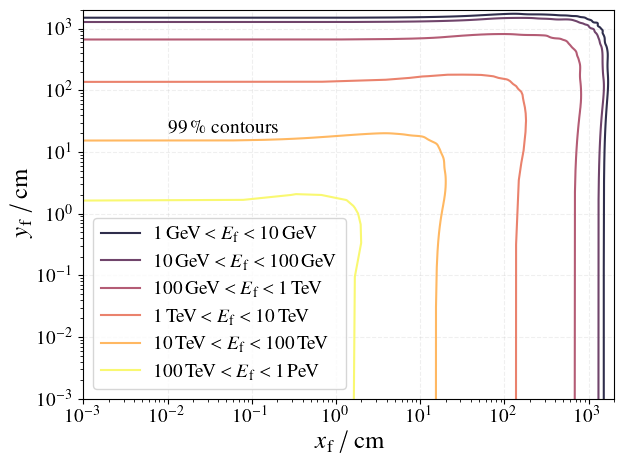

In [93]:
df = 'df_12'
e_f_mins = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
e_f_mins_labels = ['1\,GeV', '10\,GeV', '100\,GeV', '1\,TeV', '10\,TeV', '100\,TeV', '1\,PeV']

colors = ['#2F2E4C', '#70446B', '#B45C75', '#EA826D', '#FFB862', '#F9F871']

fig = plt.figure(figsize=(6.4, 4.8))

legend_elements = []
for i, l in zip(range(len(e_f_mins)-1), e_f_mins_labels):
    if e_f_mins[i+1] < 1e5:
        bins = (np.logspace(-8, 3.5, 300), np.logspace(-8, 3.5, 300))
    else: 
        bins = (np.logspace(-8, 2, 300), np.logspace(-8, 2, 300))
    x = abs(df_dict[df].x_f[(df_dict[df].E_f < e_f_mins[i+1]) & (df_dict[df].E_f > e_f_mins[i])])
    y = abs(df_dict[df].y_f[(df_dict[df].E_f < e_f_mins[i+1]) & (df_dict[df].E_f > e_f_mins[i])])

    # plt.hist(x, bins=np.logspace(-8, 3, 100))
    xx, yy = np.mgrid[bins[0].min():bins[0].max():complex(len(bins[0])), bins[1].min():bins[1].max():complex(len(bins[1]))]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)

    z = (f.max() - f) / (f.max() - f.min())
    contour = plt.contour(xx, yy, z, [0.99], colors=colors[i])
    # labels = plt.clabel(contour, colors=colors[i]) # fmt={0.99: rf'${e_f_mins[i]} <$' + r'$E_{\mathrm{f}}$'+ rf'$< {e_f_mins[i+1]}$'}

    legend_elements.append(plt.Line2D([0], [0], linestyle='-', color=colors[i], label=rf'{e_f_mins_labels[i]}$\,<\,$' + r'$E_{\mathrm{f}}$'+ rf'$\,<\,${e_f_mins_labels[i+1]}'))
plt.legend(handles=legend_elements, loc='lower left', fontsize=14)
plt.xlim(1e-3, 2e3)
plt.ylim(1e-3, 2e3)
plt.text(1e-2, 2e1, r'$99\,\%$ contours', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$x_{\mathrm{f}}\,/\,$cm', fontsize=18)
plt.ylabel(r'$y_{\mathrm{f}}\,/\,$cm', fontsize=18)
plt.grid(alpha=0.2, linestyle='--')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'lateral_profile.pdf', bbox_inches='tight')

# 1 TeV continuous E_f

In [25]:
path = 'data/total_defl_moliere_1TeV_continuous_E_f/'

df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [13, 14]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

[1.06952991 1.01116113 0.88812862 0.71511419 0.54021378 0.3814852
 0.25134068 0.15543342 0.08304081 0.03208741        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]


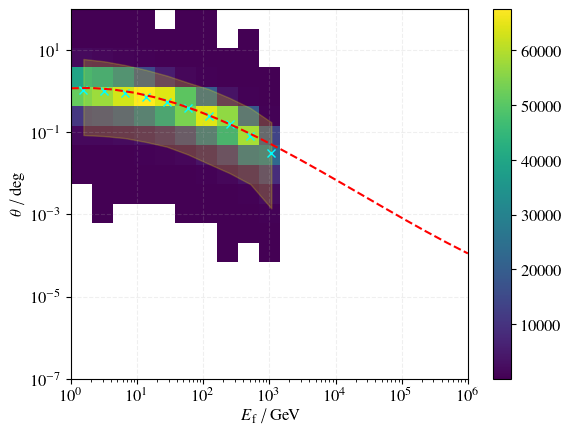

In [26]:
df = 'df_14'
bins = (np.logspace(0, 6, 20), np.logspace(-7, 2, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1)

bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]

ret_median = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, 'x', color='cyan')
print(ret_median.statistic)

ret_lower = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.b')
ret_upper = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.b')
plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.2, color='yellow')

plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel(r'$\theta\,/\,$deg')
plt.colorbar()
plt.grid(alpha=0.2, linestyle='--')

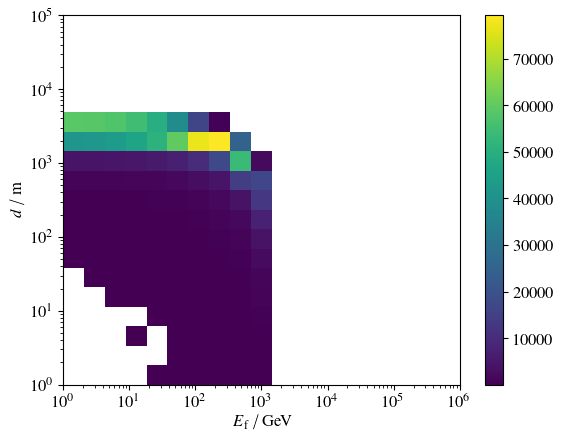

In [27]:
df = 'df_14'
bins = (np.logspace(0, 6, 20), np.logspace(0, 5, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].distances, bins=bins, cmin=1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel(r'$d\,/\,$m')
plt.colorbar()

1471.4165786195776
2537.5842156314893
2698.6720458707673


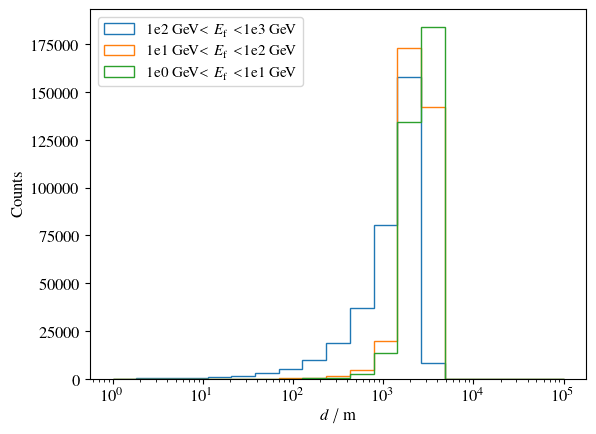

In [28]:
df = 'df_14'
bins = np.logspace(0, 5, 20)
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e3) & (df_dict[df].E_f > 1e2)], bins=bins, histtype='step', label=r'1e2 GeV$< E_{\mathrm{f}} < $1e3 GeV')
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e2) & (df_dict[df].E_f > 1e1)], bins=bins, histtype='step', label=r'1e1 GeV$< E_{\mathrm{f}} < $1e2 GeV')
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e1) & (df_dict[df].E_f > 1e0)], bins=bins, histtype='step', label=r'1e0 GeV$< E_{\mathrm{f}} < $1e1 GeV')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$d\,/\,$m')
plt.ylabel('Counts')
plt.legend()


print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e3) & (df_dict[df].E_f > 1e2)]))
print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e2) & (df_dict[df].E_f > 1e1)]))
print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e1) & (df_dict[df].E_f > 1e0)]))

# 10 PeV continuous E_f

In [29]:
path = 'data/total_defl_moliere_10PeV_continuous_E_f/'

df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [15, 16]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

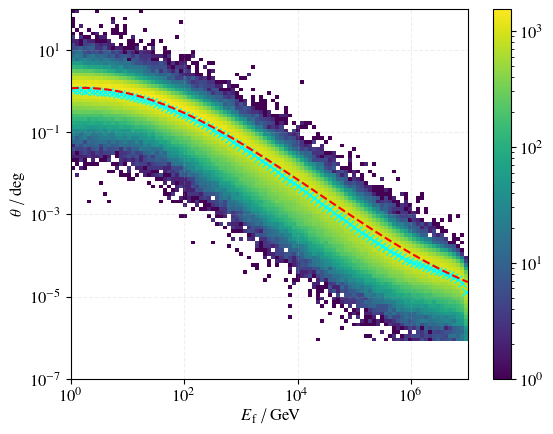

In [30]:
df = 'df_16'
bins = (np.logspace(0, 7, 100), np.logspace(-7, 2, 100))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1, norm=LogNorm())

bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]

ret_median = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, 'x', color='cyan')
# print(ret_median.statistic)

ret_lower = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.b')
ret_upper = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.b')
# plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.7, color='yellow')
# print(ret_lower.statistic)

plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel(r'$\theta\,/\,$deg')
plt.colorbar()
plt.grid(alpha=0.2, linestyle='--')

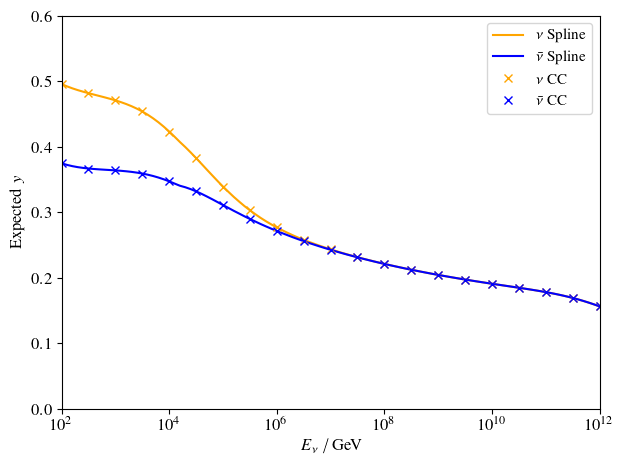

In [31]:
# Neutrino Review Paper Fig. 10
# df_y = pd.read_hdf('/net/big-tank/POOL/users/pgutjahr/data/data/PROPOSAL_data/muon_deflection/data/y_data.hdf5')
df_y = pd.read_hdf('../data/bjorken_scaling/y_data.hdf5')
# y: energy transfer to nucleus --> (1-y) energy transfer to muon, E_mu = (1-y) * E_nu
spl_nu = UnivariateSpline(df_y.neutrino_energy, df_y.exp_y_simps, s=0)
plt.plot(df_y.neutrino_energy, spl_nu(df_y.neutrino_energy), color='orange', label=r'$\nu$ Spline')

spl_nu_bar = UnivariateSpline(df_y.neutrino_energy, df_y.exp_y_bar_simps, s=0)
plt.plot(df_y.neutrino_energy, spl_nu_bar(df_y.neutrino_energy), color='blue', label=r'$\bar{\nu}$ Spline')


plt.plot(df_y.neutrino_energy[::5], df_y.exp_y_simps[::5], 'x', color='orange', label=r'$\nu \ \mathrm{CC}$')
plt.plot(df_y.neutrino_energy[::5], df_y.exp_y_bar_simps[::5], 'x', color='blue', label=r'$\bar{\nu} \ \mathrm{CC}$')
plt.xscale('log')
plt.xlabel(r'$E_\nu\,/\,$GeV')
plt.ylabel(r'Expected $y$')
plt.ylim(0., 0.6)
plt.xlim(1e2, 1e12)
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'expected_y.pdf')

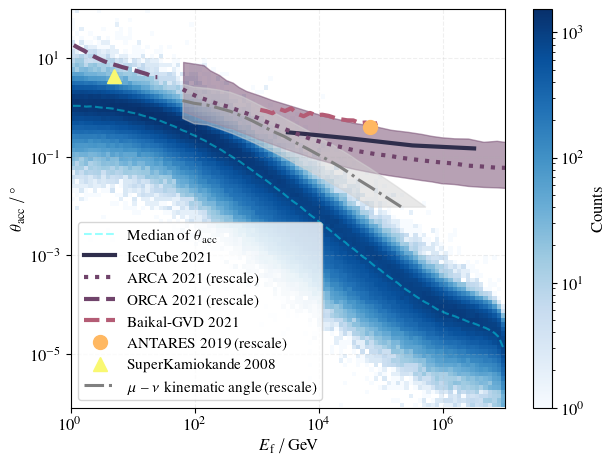

In [35]:
df = 'df_16'

fig = plt.figure(figsize=(6.4, 4.8))

bins = (np.logspace(0, 7, 100), np.logspace(-7, 2, 100))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1, norm=LogNorm(), cmap='Blues')

bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]

ret_median = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, '--', color='cyan', alpha=0.4, label=r'Median of $\theta_{\mathrm{acc}}$')
# print(ret_median.statistic)

ret_lower = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.b')
ret_upper = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.b')
# plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.7, color='yellow')








# rescale neutrino energy to muon energy
def rescale_neutrino_E_to_muon_E(x, splines=None, no_rescale=False):
    if not no_rescale:    
        if splines == None:
            # naive rescale
            return x * 0.8
        else:
            return (1 - splines(x)) * x
    else:
        print('no rescale')
        return x
    
###### comparison to current neutrino telescopes ##########      
    
    
# IceCube 2021, https://arxiv.org/abs/2103.16931 (median angular resolution of muon reconstruction as function of
# muon energy)
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='#2F2E4C', linewidth=3, label='IceCube 2021')

# ARCA 2021 2107.13050 (angular resolution as function of neutrino energy) preliminary
ARCA = pd.read_csv('../angular_resolution/ARCA.csv', sep=';', decimal=',', names=['E', 'theta'])
ARCA_high = pd.read_csv('../angular_resolution/ARCA_high.csv', sep=';', decimal=',', names=['E', 'theta'])
ARCA_low = pd.read_csv('../angular_resolution/ARCA_low.csv', sep=';', decimal=',', names=['E', 'theta'])

plt.plot(rescale_neutrino_E_to_muon_E(10**ARCA.E, splines=spl_nu), 10**ARCA.theta, linestyle=':', color='#70446B', linewidth=3, label='ARCA 2021 (rescale)')
plt.fill_between(rescale_neutrino_E_to_muon_E(10**ARCA_low.E, splines=spl_nu), 10**ARCA_low.theta, 10**ARCA_high.theta, alpha=0.5, color='#70446B')

# ORCA 2021
ORCA = pd.read_csv('../data/ORCA_resolution/ORCA_nu_mu_resolution.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(rescale_neutrino_E_to_muon_E(ORCA.E, splines=spl_nu), ORCA.theta, '--', color='#70446B', linewidth=3, label='ORCA 2021 (rescale)')

# Baikal 2019 (also published in paper of 2021 2106.06288v2)
# plt.plot(rescale_neutrino_E_to_muon_E(100*1e3, splines=spl_nu), 0.5, '^', markersize=4, color='black', label='Baikal 2019 (rescale)') # for track length > 500 meter and E_nu > 10 GeV

# Baikal 2021 ICRC Proceedings (2ns time resolution)
Baikal = pd.read_csv('../angular_resolution/Baikal_2021_ICRC_resolution.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(Baikal.E*1e3, Baikal.theta, '--', color='#B45C75', linewidth=3, label='Baikal-GVD 2021')

# ANTARES 2019
plt.plot(rescale_neutrino_E_to_muon_E(100*1e3, splines=spl_nu), 0.4, 'o', markersize=10, color='#FFB862', label='ANTARES 2019 (rescale)')

# Kamiokande 2008
plt.plot(5, 4.3, '^', markersize=10, color='#F9F871', label='SuperKamiokande 2008')



# kinematic angle read from KM3NeT 2016
# kinematic_angle = pd.read_csv('data/kinematic_muon_neutrino_angle_KM3NeT.csv', sep=';', decimal=',', names=['E', 'theta'])
# plt.plot(rescale_neutrino_E_to_muon_E(kinematic_angle.E, splines=spl_nu), kinematic_angle.theta, '.', label=r'$\mu$ -- $\nu$ kinematic angle (rescale)') # scattering angle KM3NeT')

# kinematic anlge reade from KM3NeT/ARCA 2021
kinematic_angle_low = pd.read_csv('../data/mu_nu_kinematic_ARCA_2021/Low.csv', sep=';', decimal=',', names=['E', 'theta'])
kinematic_angle_mid = pd.read_csv('../data/mu_nu_kinematic_ARCA_2021/mid.csv', sep=';', decimal=',', names=['E', 'theta'])
kinematic_angle_high = pd.read_csv('../data/mu_nu_kinematic_ARCA_2021/High.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(rescale_neutrino_E_to_muon_E(10**kinematic_angle_mid.E, splines=spl_nu), 10**kinematic_angle_mid.theta, '-.', linewidth=2.2, color='grey', alpha=1, label=r'$\mu$ -- $\nu$ kinematic angle (rescale)') # scattering angle KM3NeT')
# plt.fill_between(rescale_neutrino_E_to_muon_E(10**kinematic_angle_low.E, splines=spl_nu), 10**kinematic_angle_low.theta, 10**kinematic_angle_high.theta[:-2], alpha=0.2, color='black')
plt.fill(np.append(rescale_neutrino_E_to_muon_E(10**kinematic_angle_low.E, splines=spl_nu), rescale_neutrino_E_to_muon_E(10**kinematic_angle_high.E, splines=spl_nu)[::-1]), 
         np.append(10**kinematic_angle_low.theta, 10**kinematic_angle_high.theta[::-1]), 
         alpha=0.5, color='lightgrey')


# plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel(r'$\theta_{\mathrm{acc}}\,/\,$°')
plt.ylim(8e-7)
cbar = plt.colorbar(label='Counts')
plt.grid(alpha=0.2, linestyle='--')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'final_plot_02.pdf', bbox_inches='tight')

In [36]:
colors = ['#2F2E4C', '#70446B', '#B45C75', '#EA826D', '#FFB862', '#F9F871']

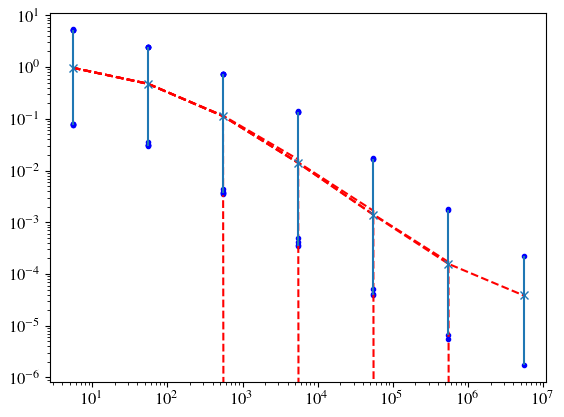

In [47]:
bins = np.logspace(0, 7, 8)
bin_mids = [bins[i] + (bins[i+1] - bins[i])/2 for i in range(len(bins)-1)]


### E_i = 10 PeV
path = 'data/total_defl_moliere_10PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [15, 16]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_16'
ret_median_10PeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins)
plt.plot(bin_mids, ret_median_10PeV.statistic, '--', color='red')
ret_lower_10PeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins)
plt.plot(bin_mids, ret_lower_10PeV.statistic, '.b')
ret_upper_10PeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins)
plt.plot(bin_mids, ret_upper_10PeV.statistic, '.b')

### E_i = 1 PeV
path = 'data/total_defl_moliere_1PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [11, 12]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_12'
ret_median_1PeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins)
plt.plot(bin_mids, ret_median_1PeV.statistic, '--', color='red')
ret_lower_1PeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins)
plt.plot(bin_mids, ret_lower_1PeV.statistic, '.b')
ret_upper_1PeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins)
plt.plot(bin_mids, ret_upper_1PeV.statistic, '.b')

### E_i = 100 TeV
path = 'data/total_defl_moliere_100TeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [19, 20]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_20'
ret_median_100TeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins)
plt.plot(bin_mids, ret_median_100TeV.statistic, '--', color='red')
ret_lower_100TeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins)
plt.plot(bin_mids, ret_lower_100TeV.statistic, '.b')
ret_upper_100TeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins)
plt.plot(bin_mids, ret_upper_100TeV.statistic, '.b')

### E_i = 10 TeV
path = 'data/total_defl_moliere_10TeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [21, 20]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_20'
ret_median_10TeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins)
plt.plot(bin_mids, ret_median_10TeV.statistic, '--', color='red')
ret_lower_10TeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins)
plt.plot(bin_mids, ret_lower_10TeV.statistic, '.b')
ret_upper_10TeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins)
plt.plot(bin_mids, ret_upper_10TeV.statistic, '.b')


### E_i = 1 TeV
path = 'data/total_defl_moliere_1TeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [13, 14]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_14'
ret_median_1TeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins)
plt.plot(bin_mids, ret_median_1TeV.statistic, '--', color='red')
ret_lower_1TeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins)
plt.plot(bin_mids, ret_lower_1TeV.statistic, '.b')
ret_upper_1TeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins)
plt.plot(bin_mids, ret_upper_1TeV.statistic, '.b')





plt.errorbar(bin_mids, ret_median_10PeV.statistic, 
             yerr=(ret_median_10PeV.statistic - ret_lower_10PeV.statistic, 
                   ret_upper_10PeV.statistic - ret_median_10PeV.statistic), fmt='x')

plt.yscale('log')
plt.xscale('log')

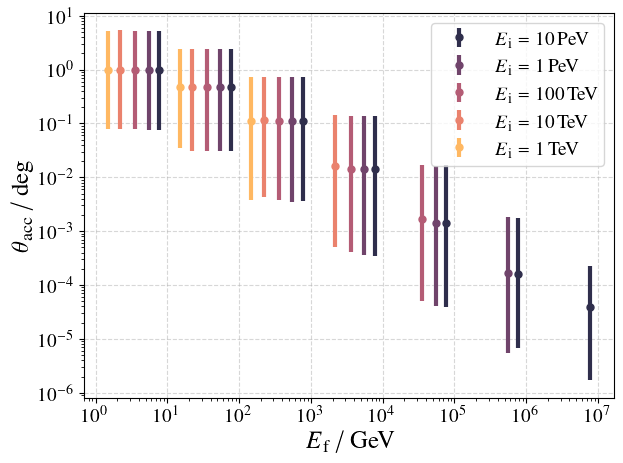

In [48]:
bin_mids = np.array(bin_mids)
num_colors = 5
# colors = plt.cm.inferno(np.linspace(0, 1, num_colors))
colors = ['#2F2E4C', '#70446B', '#B45C75', '#EA826D', '#FFB862', '#F9F871']

fig = plt.figure(figsize=(6.4, 4.8))


### E_i = 10 PeV
plt.errorbar(bin_mids*1.4, ret_median_10PeV.statistic, 
             yerr=(ret_median_10PeV.statistic - ret_lower_10PeV.statistic, 
                   ret_upper_10PeV.statistic - ret_median_10PeV.statistic), 
            fmt='.', label=r'$E_{\mathrm{i}} = 10\,$PeV',
            linewidth=3, markersize=10, color=colors[0])

### E_i = 1 PeV
plt.errorbar(bin_mids*1, ret_median_1PeV.statistic, 
             yerr=(ret_median_1PeV.statistic - ret_lower_1PeV.statistic, 
                   ret_upper_1PeV.statistic - ret_median_1PeV.statistic), 
            fmt='.', label=r'$E_{\mathrm{i}} = 1\,$PeV',
            linewidth=3, markersize=10, color=colors[1])


### E_i = 100 TeV
plt.errorbar(bin_mids*0.65, ret_median_100TeV.statistic, 
             yerr=(ret_median_100TeV.statistic - ret_lower_100TeV.statistic, 
                   ret_upper_100TeV.statistic - ret_median_100TeV.statistic), 
            fmt='.', label=r'$E_{\mathrm{i}} = 100\,$TeV',
            linewidth=3, markersize=10, color=colors[2])


### E_i = 10 TeV
plt.errorbar(bin_mids*0.4, ret_median_10TeV.statistic, 
             yerr=(ret_median_10TeV.statistic - ret_lower_10TeV.statistic, 
                   ret_upper_10TeV.statistic - ret_median_10TeV.statistic), 
            fmt='.', label=r'$E_{\mathrm{i}} = 10\,$TeV',
            linewidth=3, markersize=10, color=colors[3])

### E_i = 1 TeV
plt.errorbar(bin_mids*0.27, ret_median_1TeV.statistic, 
             yerr=(ret_median_1TeV.statistic - ret_lower_1TeV.statistic, 
                   ret_upper_1TeV.statistic - ret_median_1TeV.statistic), 
            fmt='.', label=r'$E_{\mathrm{i}} = 1\,$TeV',
            linewidth=3, markersize=10, color=colors[4])


plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV', fontsize=18)
plt.ylabel(r'$\theta_{\mathrm{acc}}\,/\,$deg', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'final_plot_intervals.pdf', bbox_inches='tight')

11892.939969766028
21147.32047245557


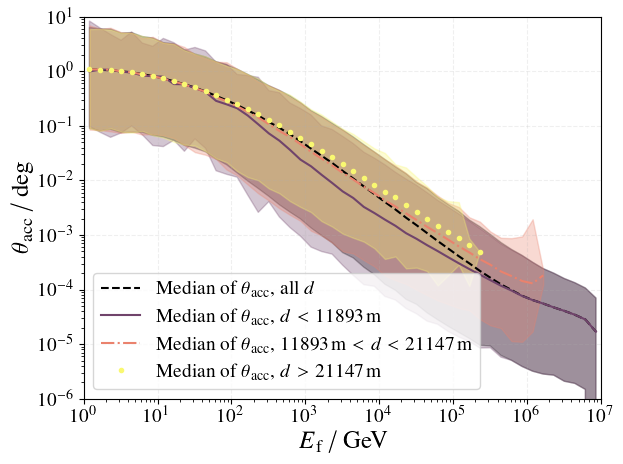

In [50]:
### E_i = 10 PeV
path = 'data/total_defl_moliere_10PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [15, 16]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_16'

fig = plt.figure(figsize=(6.4, 4.8))

bins = (np.logspace(0, 7, 50), np.logspace(-7, 2, 50))
# plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1, norm=LogNorm(), cmap='inferno')

bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]


### all distances
ret_median = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, '--', color='black', label=r'Median of $\theta_{\mathrm{acc}}$, all $d$')
# print(ret_median.statistic)

ret_lower = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.r')
ret_upper = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.r')
plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.3, color='black')


### d < 7 km 
d_cut_l = np.quantile(df_dict[df].distances, 0.33)
print(d_cut_l)
ret_median = stats.binned_statistic(df_dict[df].E_f.values[df_dict[df].distances < d_cut_l], values=df_dict[df].deflection.values[df_dict[df].distances < d_cut_l], statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, '-', color=colors[1], label=r'Median of $\theta_{\mathrm{acc}}$, $d < 11893\,$m')

ret_lower = stats.binned_statistic(df_dict[df].E_f.values[df_dict[df].distances < d_cut_l], values=df_dict[df].deflection.values[df_dict[df].distances < d_cut_l], statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.b')
ret_upper = stats.binned_statistic(df_dict[df].E_f.values[df_dict[df].distances < d_cut_l], values=df_dict[df].deflection.values[df_dict[df].distances < d_cut_l], statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.b')
plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.3, color=colors[1])



### d < 5 km 
d_cut_h = np.quantile(df_dict[df].distances, 0.66)
print(d_cut_h)
ret_median = stats.binned_statistic(df_dict[df].E_f.values[(df_dict[df].distances > d_cut_l) & (df_dict[df].distances < d_cut_h)], values=df_dict[df].deflection.values[(df_dict[df].distances > d_cut_l) & (df_dict[df].distances < d_cut_h)], statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, '-.', color=colors[3], label=r'Median of $\theta_{\mathrm{acc}}$, $11893\,\mathrm{m} < d < 21147\,$m')

ret_lower = stats.binned_statistic(df_dict[df].E_f.values[(df_dict[df].distances > d_cut_l) & (df_dict[df].distances < d_cut_h)], values=df_dict[df].deflection.values[(df_dict[df].distances > d_cut_l) & (df_dict[df].distances < d_cut_h)], statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.g')
ret_upper = stats.binned_statistic(df_dict[df].E_f.values[(df_dict[df].distances > d_cut_l) & (df_dict[df].distances < d_cut_h)], values=df_dict[df].deflection.values[(df_dict[df].distances > d_cut_l) & (df_dict[df].distances < d_cut_h)], statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.g')
plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.3, color=colors[3])


### d < 7 km 
ret_median = stats.binned_statistic(df_dict[df].E_f.values[df_dict[df].distances > d_cut_h], values=df_dict[df].deflection.values[df_dict[df].distances > d_cut_h], statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, '.', color=colors[5], label=r'Median of $\theta_{\mathrm{acc}}$, $d > 21147\,$m')

ret_lower = stats.binned_statistic(df_dict[df].E_f.values[df_dict[df].distances > d_cut_h], values=df_dict[df].deflection.values[df_dict[df].distances > d_cut_h], statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.', color=colors[3])
ret_upper = stats.binned_statistic(df_dict[df].E_f.values[df_dict[df].distances > d_cut_h], values=df_dict[df].deflection.values[df_dict[df].distances > d_cut_h], statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.', color=colors[3])
plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.3, color=colors[5])



# plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV', fontsize=18)
plt.ylabel(r'$\theta_{\mathrm{acc}}\,/\,$deg', fontsize=18)
plt.ylim(8e-7)
# cbar = plt.colorbar(label='Counts')
plt.grid(alpha=0.2, linestyle='--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlim(1, 1e7)
plt.ylim(1e-6, 1e1)
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'propagation_distances.pdf', bbox_inches='tight')

In [ ]:
plt.hist(df_dict[df].distances, bins=np.logspace(0,5, 50), histtype='step')
plt.hist(df_dict[df].distances[df_dict[df].E_f > 1e6], bins=np.logspace(0,5, 50), histtype='step')
plt.xscale('log')
np.median(df_dict[df].distances)

# Analyze propagation distance

In [ ]:
bins = (np.logspace(0, 5, 50), np.logspace(-4, 2, 50))

### E_i = 10 PeV
path = 'data/total_defl_moliere_10PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [15, 16]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_16'

plt.hist2d(df_dict[df].distances, df_dict[df].deflection, bins=bins, cmin=1)
print(np.median(df_dict[df].distances))

plt.xlabel('distances in meter')
plt.ylabel('deflection in deg')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [ ]:
### E_i = 1 PeV
path = 'data/total_defl_moliere_1PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [11, 12]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_12'
plt.hist2d(df_dict[df].distances, df_dict[df].deflection, bins=bins, cmin=100)
print(np.median(df_dict[df].distances))

plt.xlabel('distances in meter')
plt.ylabel('deflection in deg')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.vlines(np.median(df_dict[df].distances), 1e-4, 1e2, color='red')

In [ ]:
### E_i = 1 TeV
path = 'data/total_defl_moliere_1TeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [13, 14]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_14'
plt.hist2d(df_dict[df].distances, df_dict[df].deflection, bins=bins, cmin=1)
print(np.median(df_dict[df].distances))

plt.xlabel('distances in meter')
plt.ylabel('deflection in deg')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [ ]:
bins = (np.logspace(-1, 7, 50), np.logspace(0, 5, 50), )
bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]


### E_i = 10 PeV
path = 'data/total_defl_moliere_10PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [15, 16]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_16'
plt.hist2d(df_dict[df].E_f, df_dict[df].distances, bins=bins, cmin=1)
print(np.median(df_dict[df].distances))

ret_median_10PeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].distances.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median_10PeV.statistic, '--', color='red')
ret_lower_10PeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].distances.values, statistic=lower_int, bins=bins[0])
plt.plot(bin_mids, ret_lower_10PeV.statistic, '.b')
ret_upper_10PeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].distances.values, statistic=upper_int, bins=bins[0])
plt.plot(bin_mids, ret_upper_10PeV.statistic, '.b')

plt.ylabel('distances in meter')
plt.xlabel('final energy in GeV')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [ ]:
bins = (np.logspace(-1, 7, 50), np.logspace(0, 5, 50), )

### E_i = 1 PeV
path = 'data/total_defl_moliere_1PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [11, 12]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_12'
plt.hist2d(df_dict[df].E_f, df_dict[df].distances, bins=bins, cmin=1)
print(np.median(df_dict[df].distances))

ret_median_1PeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].distances.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median_1PeV.statistic, '--', color='red')
ret_lower_1PeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].distances.values, statistic=lower_int, bins=bins[0])
plt.plot(bin_mids, ret_lower_1PeV.statistic, '.b')
ret_upper_1PeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].distances.values, statistic=upper_int, bins=bins[0])
plt.plot(bin_mids, ret_upper_1PeV.statistic, '.b')

plt.ylabel('distances in meter')
plt.xlabel('final energy in GeV')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [ ]:
bins = (np.logspace(-1, 7, 50), np.logspace(0, 5, 50), )

### E_i = 1 TeV
path = 'data/total_defl_moliere_1TeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [13, 14]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_14'
plt.hist2d(df_dict[df].E_f, df_dict[df].distances, bins=bins, cmin=1)
print(np.median(df_dict[df].distances))

ret_median_1TeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].distances.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median_1TeV.statistic, '--', color='red')
ret_lower_1TeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].distances.values, statistic=lower_int, bins=bins[0])
plt.plot(bin_mids, ret_lower_1TeV.statistic, '.b')
ret_upper_1TeV = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].distances.values, statistic=upper_int, bins=bins[0])
plt.plot(bin_mids, ret_upper_1TeV.statistic, '.b')

plt.ylabel('distances in meter')
plt.xlabel('final energy in GeV')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [ ]:
plt.plot(bin_mids, ret_median_10PeV.statistic, '--', color='red')
plt.fill_between(bin_mids, ret_lower_10PeV.statistic, ret_upper_10PeV.statistic, color='red', alpha=0.1)

plt.plot(bin_mids, ret_median_1PeV.statistic, '--', color='red')
plt.fill_between(bin_mids, ret_lower_1PeV.statistic, ret_upper_1PeV.statistic, color='red', alpha=0.1)

plt.plot(bin_mids, ret_median_1TeV.statistic, '--', color='red')
plt.fill_between(bin_mids, ret_lower_1TeV.statistic, ret_upper_1TeV.statistic, color='red', alpha=0.1)

plt.ylabel('distances in meter')
plt.xlabel('final energy in GeV')
plt.xscale('log')
plt.yscale('log')


In [ ]:
bins = (np.logspace(-4, 2, 50), np.logspace(0, 5, 50))

### E_i = 1 PeV
path = 'data/total_defl_moliere_1PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [11, 12]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_12'
plt.hist2d(df_dict[df].deflection, df_dict[df].distances, bins=bins, cmin=100)
print(np.median(df_dict[df].distances))

plt.ylabel('distances in meter')
plt.xlabel('deflection in deg')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [ ]:
bins = (np.logspace(0, 7, 50), np.logspace(-10, 2, 50))

### E_i = 1 PeV
path = 'data/total_defl_moliere_1PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [11, 12]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_12'
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection/df_dict[df].distances, bins=bins, cmin=1)
print(np.median(df_dict[df].distances))

plt.xlabel('final energy in GeV')
plt.ylabel('deflecttion / distance in deg/m')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [ ]:
bins = (np.logspace(-5, 7, 50), np.logspace(-10, 2, 50))

### E_i = 1 PeV
path = 'data/total_defl_moliere_1PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [11, 12]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_12'
plt.hist2d(df_dict[df].E_f/df_dict[df].distances, df_dict[df].deflection, bins=bins, cmin=1)
print(np.median(df_dict[df].distances))

plt.xlabel('final energy / distance in GeV/m')
plt.ylabel('deflecttion in deg')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [ ]:
bins = (np.logspace(0, 5, 50), np.logspace(-6, 2, 50))

### E_i = 1 PeV
path = 'data/total_defl_moliere_1PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [11, 12]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_12'
plt.hist2d(df_dict[df].distances, df_dict[df].deflection, bins=bins, cmin=1)

plt.xlabel('distance in meter')
plt.ylabel('deflecttion in deg')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [ ]:
bins = (np.logspace(0, 5, 50), np.logspace(-6, 2, 50))
bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]


### E_i = 10 PeV
path = 'data/total_defl_moliere_10PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [15, 16]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_16'
plt.hist2d(df_dict[df].distances, df_dict[df].deflection, bins=bins, cmin=1)
print(np.median(df_dict[df].distances))

ret_median_10PeV = stats.binned_statistic(df_dict[df].distances.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median_10PeV.statistic, '--', color='red')
ret_lower_10PeV = stats.binned_statistic(df_dict[df].distances.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
plt.plot(bin_mids, ret_lower_10PeV.statistic, '.b')
ret_upper_10PeV = stats.binned_statistic(df_dict[df].distances.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
plt.plot(bin_mids, ret_upper_10PeV.statistic, '.b')

plt.xlabel('distances in meter')
plt.ylabel('deflection in deg')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [ ]:
bins = (np.logspace(0, 5, 50), np.logspace(-6, 2, 50))
bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]


### E_i = 1 PeV
path = 'data/total_defl_moliere_1PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [11, 12]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_12'
plt.hist2d(df_dict[df].distances, df_dict[df].deflection, bins=bins, cmin=1)
print(np.median(df_dict[df].distances))

ret_median_1PeV = stats.binned_statistic(df_dict[df].distances.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median_1PeV.statistic, '--', color='red')
ret_lower_1PeV = stats.binned_statistic(df_dict[df].distances.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
plt.plot(bin_mids, ret_lower_1PeV.statistic, '.b')
ret_upper_1PeV = stats.binned_statistic(df_dict[df].distances.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
plt.plot(bin_mids, ret_upper_1PeV.statistic, '.b')

plt.xlabel('distances in meter')
plt.ylabel('deflection in deg')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [ ]:
bins = (np.logspace(0, 5, 50), np.logspace(-6, 2, 50))
bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]


### E_i = 1 TeV
path = 'data/total_defl_moliere_1TeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [13, 14]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_14'
plt.hist2d(df_dict[df].distances, df_dict[df].deflection, bins=bins, cmin=1)
print(np.median(df_dict[df].distances))

ret_median_1TeV = stats.binned_statistic(df_dict[df].distances.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median_1TeV.statistic, '--', color='red')
ret_lower_1TeV = stats.binned_statistic(df_dict[df].distances.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
plt.plot(bin_mids, ret_lower_1TeV.statistic, '.b')
ret_upper_1TeV = stats.binned_statistic(df_dict[df].distances.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
plt.plot(bin_mids, ret_upper_1TeV.statistic, '.b')

plt.xlabel('distances in meter')
plt.ylabel('deflection in deg')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [ ]:
plt.plot(bin_mids, ret_median_10PeV.statistic, '--', color='red')
plt.fill_between(bin_mids, ret_lower_10PeV.statistic, ret_upper_10PeV.statistic, color='red', alpha=0.1)

plt.plot(bin_mids, ret_median_1PeV.statistic, '--', color='red')
plt.fill_between(bin_mids, ret_lower_1PeV.statistic, ret_upper_1PeV.statistic, color='red', alpha=0.1)

plt.plot(bin_mids, ret_median_1TeV.statistic, '--', color='red')
plt.fill_between(bin_mids, ret_lower_1TeV.statistic, ret_upper_1TeV.statistic, color='red', alpha=0.1)

plt.xlabel('distances in meter')
plt.ylabel('deflection in deg')
plt.xscale('log')
plt.yscale('log')



In [ ]:
bins = (np.logspace(-6, 2, 50), np.logspace(0, 5, 50))
bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]


### E_i = 10 PeV
path = 'data/total_defl_moliere_10PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [15, 16]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_16'
plt.hist2d(df_dict[df].deflection, df_dict[df].distances, bins=bins, cmin=1)
print(np.median(df_dict[df].distances))

ret_median_10PeV = stats.binned_statistic(df_dict[df].deflection.values, values=df_dict[df].distances.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median_10PeV.statistic, '--', color='red')
ret_lower_10PeV = stats.binned_statistic(df_dict[df].deflection.values, values=df_dict[df].distances.values, statistic=lower_int, bins=bins[0])
plt.plot(bin_mids, ret_lower_10PeV.statistic, '.b')
ret_upper_10PeV = stats.binned_statistic(df_dict[df].deflection.values, values=df_dict[df].distances.values, statistic=upper_int, bins=bins[0])
plt.plot(bin_mids, ret_upper_10PeV.statistic, '.b')

plt.ylabel('distances in meter')
plt.xlabel('deflection in deg')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [ ]:
bins = (np.logspace(-6, 2, 50), np.logspace(0, 5, 50))
bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]


### E_i = 1 TeV
path = 'data/total_defl_moliere_1TeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [13, 14]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_14'
plt.hist2d(df_dict[df].deflection, df_dict[df].distances, bins=bins, cmin=1)
print(np.median(df_dict[df].distances))

ret_median_1TeV = stats.binned_statistic(df_dict[df].deflection.values, values=df_dict[df].distances.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median_1TeV.statistic, '--', color='red')
ret_lower_1TeV = stats.binned_statistic(df_dict[df].deflection.values, values=df_dict[df].distances.values, statistic=lower_int, bins=bins[0])
plt.plot(bin_mids, ret_lower_1TeV.statistic, '.b')
ret_upper_1TeV = stats.binned_statistic(df_dict[df].deflection.values, values=df_dict[df].distances.values, statistic=upper_int, bins=bins[0])
plt.plot(bin_mids, ret_upper_1TeV.statistic, '.b')

plt.ylabel('distances in meter')
plt.xlabel('deflection in deg')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [ ]:
plt.plot(bin_mids, ret_median_10PeV.statistic, '--', color='red')
plt.fill_between(bin_mids, ret_lower_10PeV.statistic, ret_upper_10PeV.statistic, color='red', alpha=0.1)

# plt.plot(bin_mids, ret_median_1PeV.statistic, '--', color='red')
# plt.fill_between(bin_mids, ret_lower_1PeV.statistic, ret_upper_1PeV.statistic, color='red', alpha=0.1)

plt.plot(bin_mids, ret_median_1TeV.statistic, '--', color='red')
plt.fill_between(bin_mids, ret_lower_1TeV.statistic, ret_upper_1TeV.statistic, color='red', alpha=0.1)

plt.ylabel('distances in meter')
plt.xlabel('deflection in deg')
plt.xscale('log')
plt.yscale('log')



In [ ]:
bins = (np.logspace(0, 5, 100), np.logspace(-6, 2, 100))
bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]


### E_i = 1 PeV
path = 'data/total_defl_moliere_1PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [11, 12]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_12'

x = df_dict[df].distances
y = df_dict[df].deflection


plt.hist2d(x, y, bins=bins, cmin=1, norm=LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

hist, xedges, yedges = np.histogram2d(x, y, bins=bins)

# Calculate the cumulative distribution function (CDF) from the histogram
cdf = np.cumsum(hist.flatten()) / np.sum(hist.flatten())

# Find the contour levels corresponding to the 90% probability
contour_levels = [np.interp(0.9, cdf, hist.flatten())]


z = (hist.max() - hist) / (hist.max() - hist.min())

hist_plot = plt.contour(xedges[:-1], yedges[:-1], z, levels=[0.9],  colors='red')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bins = (np.logspace(-1, 5, 50), np.logspace(-7, 2, 50))

# Generate some random data for the histogram
### E_i = 1 PeV
path = 'data/total_defl_moliere_1PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [11, 12]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_12'

x = df_dict[df].distances
y = df_dict[df].deflection

# Create the two-dimensional histogram
hist_1PeV, xedges, yedges = np.histogram2d(x, y, bins=bins)

# Calculate the cumulative distribution function (CDF) from the histogram
cdf = np.cumsum(hist_1PeV.flatten()) / np.sum(hist_1PeV.flatten())

# Find the contour levels corresponding to the 90% probability
contour_levels_1PeV = [np.interp(0.99, cdf, hist_1PeV.flatten())]

# Create the plot with logarithmic axes
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

# Plot the histogram
hist_plot = ax.contour(xedges[:-1], yedges[:-1], hist_1PeV.T, levels=contour_levels_1PeV, colors='red')

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Two-Dimensional Histogram with 99% Contour')

plt.hist2d(x, y, bins=bins, cmin=1, norm=LogNorm())
plt.colorbar()
# Add a colorbar for the contour levels
# cbar = fig.colorbar(hist_plot)
# cbar.ax.set_ylabel('Counts')

# Show the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bins = (np.logspace(-1, 5, 50), np.logspace(-7, 2, 50))


### E_i = 1 TeV
path = 'data/total_defl_moliere_1TeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [13, 14]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_14'

x = df_dict[df].distances
y = df_dict[df].deflection

# Create the two-dimensional histogram
hist_1TeV, xedges, yedges = np.histogram2d(x, y, bins=bins)

# Calculate the cumulative distribution function (CDF) from the histogram
cdf = np.cumsum(hist_1TeV.flatten()) / np.sum(hist_1TeV.flatten())

# Find the contour levels corresponding to the 90% probability
contour_levels_1TeV = [np.interp(0.99, cdf, hist_1TeV.flatten())]

# Create the plot with logarithmic axes
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

# Plot the histogram
hist_plot = ax.contour(xedges[:-1], yedges[:-1], hist_1TeV.T, levels=contour_levels_1TeV, colors='red')

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Two-Dimensional Histogram with 99% Contour')

plt.hist2d(x, y, bins=bins, cmin=1, norm=LogNorm())
plt.colorbar()
# Add a colorbar for the contour levels
# cbar = fig.colorbar(hist_plot)
# cbar.ax.set_ylabel('Counts')

# Show the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bins = (np.logspace(-1, 5, 50), np.logspace(-7, 2, 50))


### E_i = 10 TeV
path = 'data/total_defl_moliere_10TeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [21, 20]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_20'

x = df_dict[df].distances
y = df_dict[df].deflection

# Create the two-dimensional histogram
hist_10TeV, xedges, yedges = np.histogram2d(x, y, bins=bins)

# Calculate the cumulative distribution function (CDF) from the histogram
cdf = np.cumsum(hist_10TeV.flatten()) / np.sum(hist_10TeV.flatten())

# Find the contour levels corresponding to the 90% probability
contour_levels_10TeV = [np.interp(0.99, cdf, hist_10TeV.flatten())]

# Create the plot with logarithmic axes
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

# Plot the histogram
hist_plot = ax.contour(xedges[:-1], yedges[:-1], hist_10TeV.T, levels=contour_levels_10TeV, colors='red')

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Two-Dimensional Histogram with 99% Contour')

plt.hist2d(x, y, bins=bins, cmin=1, norm=LogNorm())
plt.colorbar()
# Add a colorbar for the contour levels
# cbar = fig.colorbar(hist_plot)
# cbar.ax.set_ylabel('Counts')

# Show the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bins = (np.logspace(-1, 5, 50), np.logspace(-7, 2, 50))


### E_i = 100 TeV
path = 'data/total_defl_moliere_100TeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [19, 20]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_20'

x = df_dict[df].distances
y = df_dict[df].deflection

# Create the two-dimensional histogram
hist_100TeV, xedges, yedges = np.histogram2d(x, y, bins=bins)

# Calculate the cumulative distribution function (CDF) from the histogram
cdf = np.cumsum(hist_100TeV.flatten()) / np.sum(hist_100TeV.flatten())

# Find the contour levels corresponding to the 90% probability
contour_levels_100TeV = [np.interp(0.99, cdf, hist_100TeV.flatten())]

# Create the plot with logarithmic axes
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

# Plot the histogram
hist_plot = ax.contour(xedges[:-1], yedges[:-1], hist_100TeV.T, levels=contour_levels_100TeV, colors='red')

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Two-Dimensional Histogram with 99% Contour')

plt.hist2d(x, y, bins=bins, cmin=1, norm=LogNorm())
plt.colorbar()
# Add a colorbar for the contour levels
# cbar = fig.colorbar(hist_plot)
# cbar.ax.set_ylabel('Counts')

# Show the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bins = (np.logspace(-1, 5, 50), np.logspace(-7, 2, 50))


### E_i = 10 PeV
path = 'data/total_defl_moliere_10PeV_continuous_E_f/'
df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [15, 16]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

df = 'df_16'

x = df_dict[df].distances
y = df_dict[df].deflection

# Create the two-dimensional histogram
hist_10PeV, xedges, yedges = np.histogram2d(x, y, bins=bins)

# Calculate the cumulative distribution function (CDF) from the histogram
cdf = np.cumsum(hist_10PeV.flatten()) / np.sum(hist_10PeV.flatten())

# Find the contour levels corresponding to the 90% probability
contour_levels_10PeV = [np.interp(0.99, cdf, hist_10PeV.flatten())]

# Create the plot with logarithmic axes
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

# Plot the histogram
hist_plot = ax.contour(xedges[:-1], yedges[:-1], hist_10PeV.T, levels=contour_levels_10PeV, colors='red')

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Two-Dimensional Histogram with 99% Contour')

plt.hist2d(x, y, bins=bins, cmin=1, norm=LogNorm())
plt.colorbar()
# Add a colorbar for the contour levels
# cbar = fig.colorbar(hist_plot)
# cbar.ax.set_ylabel('Counts')

# Show the plot
plt.show()


In [ ]:
contour_1TeV = plt.contour(xedges[:-1], yedges[:-1], hist_1TeV.T, levels=contour_levels_1TeV, colors=colors[0])
contour_10TeV = plt.contour(xedges[:-1], yedges[:-1], hist_10TeV.T, levels=contour_levels_10TeV, colors=colors[1])
contour_100TeV = plt.contour(xedges[:-1], yedges[:-1], hist_100TeV.T, levels=contour_levels_100TeV, colors=colors[2])
# plt.clabel(contour_1TeV, fontsize=10, fmt={contour_levels_1TeV[0]: '1 TeV'}, colors=colors[])
contour_1PeV = plt.contour(xedges[:-1], yedges[:-1], hist_1PeV.T, levels=contour_levels_1PeV, colors=colors[3])
contour_10PeV = plt.contour(xedges[:-1], yedges[:-1], hist_10PeV.T, levels=contour_levels_10PeV, colors=colors[4])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('propagation distance in meter')
plt.ylabel('deflection in degree')
plt.xlim(5e2, 5e4)
plt.ylim(1e-5, 1e1)


# Data-MC -- Attwood

In [77]:
colors = ['#2F2E4C', '#70446B', '#B45C75', '#EA826D', '#FFB862', '#F9F871']

In [78]:
# Attwood_data = pd.read_csv('/net/big-tank/POOL/users/pgutjahr/data/data/PROPOSAL_data/muon_deflection/data/attwood/attwood_true_data.txt',
#                            sep='\s+', names=['upper_bin_edge', 'data', 'data_unc', 'G4', 'G4_unc'], engine='python', skiprows=1, skipfooter=1)
Attwood_data = pd.read_csv('../data/attwood_true_data.txt',
                           sep='\s+', names=['upper_bin_edge', 'data', 'data_unc', 'G4', 'G4_unc'], engine='python', skiprows=1, skipfooter=1)

full_data = {}
for key in Attwood_data:
    if 'bin' in key:
        full_data[key] = [-b for b in Attwood_data[key][::-1]]
    else:
        full_data[key] = [b for b in Attwood_data[key][::-1]]
    for b in Attwood_data[key]:
        full_data[key].append(b)
        
ATTWOOD = pd.DataFrame()
ATTWOOD['upper_bin_edge'] = full_data['upper_bin_edge']
ATTWOOD['data'] = full_data['data']
ATTWOOD['data_unc'] = full_data['data_unc']
ATTWOOD['G4'] = full_data['G4']
ATTWOOD['G4_unc'] = full_data['G4_unc']

hist_binning = ATTWOOD.upper_bin_edge

bin_mids = []
# bin_mids = [ATTWOOD.upper_bin_edge[0] - abs(ATTWOOD.upper_bin_edge[1] - ATTWOOD.upper_bin_edge[0])/2]
bin_mids_h = [ATTWOOD.upper_bin_edge[i] + abs(ATTWOOD.upper_bin_edge[i+1] - ATTWOOD.upper_bin_edge[i])/2 for i in range(len(ATTWOOD)-1)] 
for b in bin_mids_h:
    bin_mids.append(b)
# bin_mids.append(ATTWOOD.upper_bin_edge.values[-1] + abs(ATTWOOD.upper_bin_edge.values[-1] - ATTWOOD.upper_bin_edge.values[-2])/2 )

ATTWOOD = ATTWOOD.drop(10, axis=0)
ATTWOOD['bin_mids'] = bin_mids

In [79]:
# df_01 = pd.read_hdf('/net/big-tank/POOL/users/pgutjahr/data/data/PROPOSAL_data/muon_deflection/data/attwood_199MeV_hydrogen/attwood_run_01.hdf5') # v_cut = 1e-5
# df_02 = pd.read_hdf('/net/big-tank/POOL/users/pgutjahr/data/data/PROPOSAL_data/muon_deflection/data/attwood_199MeV_hydrogen/attwood_run_02.hdf5') # v_cut = 1e-5 only Moliere
# df_03 = pd.read_hdf('/net/big-tank/POOL/users/pgutjahr/data/data/PROPOSAL_data/muon_deflection/data/attwood_199MeV_hydrogen/attwood_run_03.hdf5') # v_cut = 1e-3

df_01 = pd.read_hdf('../data/attwood_run_01.hdf5') # v_cut = 1e-5
df_02 = pd.read_hdf('../data/attwood_run_02.hdf5') # v_cut = 1e-5 only Moliere
df_03 = pd.read_hdf('../data/attwood_run_03.hdf5') # v_cut = 1e-3

# distance should be 10.9 cm
print(np.unique(df_01.distances))
print(np.unique(df_02.distances))
print(np.unique(df_03.distances))

df_01 = df_01[df_01.distances == 0.109]
df_02 = df_02[df_02.distances == 0.109]
df_03 = df_03[df_03.distances == 0.109]

[0.00022575 0.00027958 0.00040491 ... 0.10844248 0.10861772 0.109     ]
[0.00023931 0.00036267 0.00045276 ... 0.10873776 0.10880655 0.109     ]
[4.13154889e-05 1.53319662e-04 1.97968296e-04 ... 1.09000000e-01
 1.09000000e-01 1.09000000e-01]


In [80]:
df_dict_01 = {}
for seed in np.unique(df_01.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_01[key] = df_01[df_01.rnd_seed == seed]
    
df_dict_02 = {}
for seed in np.unique(df_02.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_02[key] = df_02[df_02.rnd_seed == seed]
    
df_dict_03 = {}
for seed in np.unique(df_03.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_03[key] = df_03[df_03.rnd_seed == seed]
    
hist_data_n_01 = []
bins = hist_binning
for df in df_dict_01:
    n, x = np.histogram(df_dict_01[df].y_dir_f, bins=bins, density=True)
    hist_data_n_01.append(n)
    hist_data_n_mean_01 = np.mean(hist_data_n_01, axis=0)
hist_data_n_std_01 = np.std(hist_data_n_01, axis=0)
hist_data_n_median_01 = np.median(hist_data_n_01, axis=0)

hist_data_n_02 = []
for df in df_dict_02:
    n, x = np.histogram(df_dict_02[df].y_dir_f, bins=bins, density=True)
    hist_data_n_02.append(n)
    hist_data_n_mean_02 = np.mean(hist_data_n_02, axis=0)
hist_data_n_std_02 = np.std(hist_data_n_02, axis=0)
hist_data_n_median_02 = np.median(hist_data_n_02, axis=0)

hist_data_n_03 = []
for df in df_dict_03:
    n, x = np.histogram(df_dict_03[df].y_dir_f, bins=bins, density=True)
    hist_data_n_03.append(n)
    hist_data_n_mean_03 = np.mean(hist_data_n_03, axis=0)
hist_data_n_std_03 = np.std(hist_data_n_03, axis=0)
hist_data_n_median_03 = np.median(hist_data_n_03, axis=0)

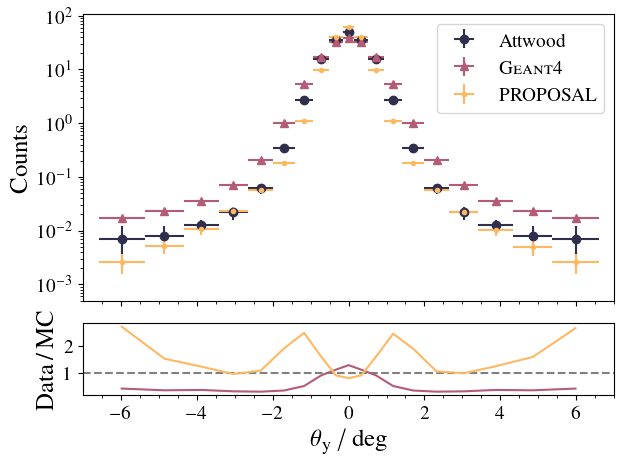

In [86]:
# attwood data
f, (ax0, ax1) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6.4, 4.8))
ax0.errorbar(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.data, fmt='o', color=colors[0], alpha=1, yerr=ATTWOOD.data_unc, xerr=abs(np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids)), label='Attwood')
ax0.errorbar(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.G4, fmt='^', color=colors[2], alpha=1, yerr=ATTWOOD.G4_unc, xerr=abs(np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids)), label=r'\textsc{Geant4}')


# run 01
ax0.errorbar(np.rad2deg(ATTWOOD.bin_mids), hist_data_n_mean_01, fmt='.', yerr=hist_data_n_std_01, xerr=abs(np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids)), color=colors[4], label=r'\raggedleft PROPOSAL')

# run 02
# ax0.errorbar(np.rad2deg(ATTWOOD.bin_mids), hist_data_n_mean_02, fmt='.', yerr=hist_data_n_std_02, xerr=abs(np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids)), color=colors[4], label=r'\raggedleft PROPOSAL \newline MSM only')

ax0.set_yscale('log')
ax0.set_ylabel('Counts', fontsize=18)
ax0.minorticks_on()
ax0.legend(bbox_to_anchor=(1,1), fontsize=14)
ax0.set_xlim(-7, 7)
ax0.set_ylim(5e-4)
ax0.tick_params(axis='y', labelsize=14)

ax1.plot(np.linspace(-7, 7, 100), np.ones(100), '--', color='grey')
ax1.plot(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.data/ATTWOOD.G4, color=colors[2])
ax1.plot(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.data/hist_data_n_mean_01, color=colors[4])
# ax1.plot(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.data/hist_data_n_mean_02, color=colors[4])
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg', fontsize=18)
ax1.set_ylabel('Data\,/\,MC', fontsize=18)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

f.tight_layout() # plt.subplots_adjust(hspace=0)
if save_plot:
    f.savefig(plot_dir + 'attwood_comparison_moliere_199MeV_final_multi_mean_deg_ratio.pdf', bbox_inches='tight')

# Data-MC -- Akimenko

In [87]:
colors = ['#2F2E4C', '#70446B', '#B45C75', '#EA826D', '#FFB862', '#F9F871']

In [88]:
# AKIMENKO = pd.read_csv('/net/big-tank/POOL/users/pgutjahr/data/data/PROPOSAL_data/muon_deflection/data/akimenko/Akimenko_true_data.txt', sep='\s+', names=['angle_low', 'angle_high', 'counts'], skiprows=1)
# df_01 = pd.read_hdf('/net/big-tank/POOL/users/pgutjahr/data/data/PROPOSAL_data/muon_deflection/data/akimenko_7301MeV_copper/akimenko_run_01.hdf5') # v_cut = 1e-5
# df_02 = pd.read_hdf('/net/big-tank/POOL/users/pgutjahr/data/data/PROPOSAL_data/muon_deflection/data/akimenko_7301MeV_copper/akimenko_run_02.hdf5') # v_cut = 1e-5 only Moliere

AKIMENKO = pd.read_csv('../data/Akimenko_true_data.txt', sep='\s+', names=['angle_low', 'angle_high', 'counts'], skiprows=1)
df_01 = pd.read_hdf('../data/akimenko_run_01.hdf5') # v_cut = 1e-5
df_02 = pd.read_hdf('../data/akimenko_run_02.hdf5') # v_cut = 1e-5 only Moliere

# distance should be 1.44 cm
print(np.unique(df_01.distances))
print(np.unique(df_02.distances))

df_01 = df_01[df_01.distances == 0.0144]
df_02 = df_02[df_02.distances == 0.0144]

[0.0144]
[0.00817724 0.0144    ]


In [89]:
df_dict_01 = {}
for seed in np.unique(df_01.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_01[key] = df_01[df_01.rnd_seed == seed]
    
df_dict_02 = {}
for seed in np.unique(df_02.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_02[key] = df_02[df_02.rnd_seed == seed]

In [90]:
bin_mids = [AKIMENKO.angle_low[i] - (AKIMENKO.angle_low[i] - AKIMENKO.angle_low[i+1])/2 for i in range(len(AKIMENKO)-1)]
bin_mids.append(AKIMENKO.angle_low.values[-1] - (AKIMENKO.angle_low.values[-1] - AKIMENKO.angle_high.values[-1])/2)

In [91]:
hist_data_n_01 = []
bins = np.append(AKIMENKO.angle_low.values/1000, AKIMENKO.angle_high.values[-1]/1000)
for df in df_dict_01:
    n, x = np.histogram(df_dict_01[df].y_dir_f, bins=bins)
    hist_data_n_01.append(n)
hist_data_n_mean_01 = np.mean(hist_data_n_01, axis=0)
hist_data_n_std_01 = np.std(hist_data_n_01, axis=0)
hist_data_n_median_01 = np.median(hist_data_n_01, axis=0)

hist_data_n_02 = []
for df in df_dict_02:
    n, x = np.histogram(df_dict_02[df].y_dir_f, bins=bins)
    hist_data_n_02.append(n)
hist_data_n_mean_02 = np.mean(hist_data_n_02, axis=0)
hist_data_n_std_02 = np.std(hist_data_n_02, axis=0)
hist_data_n_median_02 = np.median(hist_data_n_02, axis=0)

[14.4]
            z        px        py        pz
0        14.4 -0.001335  0.001153  0.999998
1        14.4  0.000516  0.001193  0.999999
2        14.4  0.001005 -0.002199  0.999997
3        14.4 -0.000556 -0.002217  0.999997
4        14.4  0.000160  0.000650  1.000000
...       ...       ...       ...       ...
3112495  14.4 -0.002061 -0.001127  0.999997
3112496  14.4 -0.003223 -0.000608  0.999995
3112497  14.4  0.001167  0.003187  0.999994
3112498  14.4  0.003580  0.000086  0.999994
3112499  14.4  0.000507  0.002035  0.999998

[3112500 rows x 4 columns]


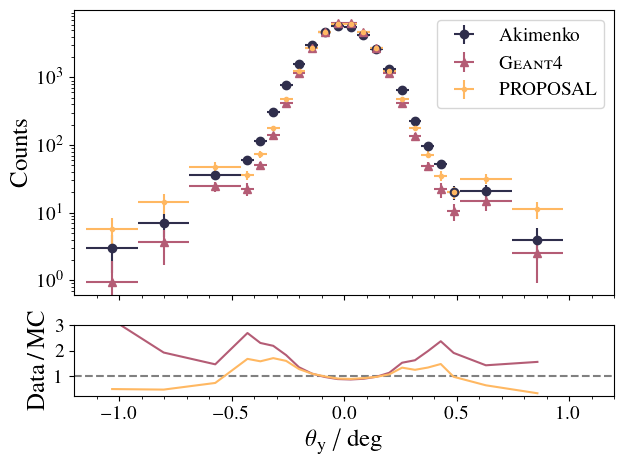

In [92]:
# data = pd.read_csv('Geant4/data/akimenko/data_n100.txt', sep=r'\s*,\s*', engine='python') # QBBC.hh
data = pd.read_csv('../Geant4/data/akimenko/data_n100.txt', sep=r'\s*,\s*', engine='python') # QBBC.hh
print(np.unique(data.z))
data = data[data.z == 14.4][:-1]
print(data)

# get x and y directions
px = data['px'].values
py = data['py'].values

# reshape arrays to get single data sets
px_shaped = px.reshape(int(len(px)/31125), 31125)
py_shaped = py.reshape(int(len(py)/31125), 31125)

# get binnend means and stds
hist_data_n_G4_x = []
for px in px_shaped:
    n, x = np.histogram(px, bins=bins)
    hist_data_n_G4_x.append(n)
hist_data_n_mean_G4_x = np.mean(hist_data_n_G4_x, axis=0)
hist_data_n_std_G4_x = np.std(hist_data_n_G4_x, axis=0)

hist_data_n_G4_y = []
for py in py_shaped:
    n, x = np.histogram(py, bins=bins)
    hist_data_n_G4_y.append(n)
hist_data_n_mean_G4_y = np.mean(hist_data_n_G4_y, axis=0)
hist_data_n_std_G4_y = np.std(hist_data_n_G4_y, axis=0)

# akimenko data
f, (ax0, ax1) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6.4, 4.8))

ax0.errorbar(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts, fmt='o', color=colors[0], alpha=1, yerr=np.sqrt(AKIMENKO.counts), xerr=abs(np.rad2deg(AKIMENKO.angle_low-bin_mids))/1e3, label='Akimenko')

# Geant4
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_G4_y, fmt='^', yerr=hist_data_n_std_G4_y, xerr=abs(np.rad2deg(AKIMENKO.angle_low-bin_mids))/1e3, color=colors[2], label=r'\textsc{Geant4}')


# run 01
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_01, fmt='.', yerr=hist_data_n_std_01, xerr=abs(np.rad2deg(AKIMENKO.angle_low-bin_mids))/1e3, color=colors[4], label=r'\raggedleft PROPOSAL \newline')
# run 02
# ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_02, fmt='.', yerr=hist_data_n_std_02, xerr=abs(np.rad2deg(AKIMENKO.angle_low-bin_mids))/1e3, color=colors[4], label=r'\raggedleft PROPOSAL \newline MSM only')

ax0.set_yscale('log')
ax0.set_ylabel('Counts', fontsize=18)
ax0.legend(fontsize=14)
ax0.minorticks_on()
ax0.set_xlim(-1.2, 1.2)
ax0.tick_params(axis='y', labelsize=14)


ax1.plot(np.linspace(-1.2, 1.2, 100), np.ones(100), '--', color='grey')
ax1.plot(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts/hist_data_n_mean_G4_y, color=colors[2])
ax1.plot(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts/hist_data_n_mean_01, color=colors[4])
# ax1.plot(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts/hist_data_n_mean_02, color=colors[4])
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg', fontsize=18)
ax1.set_ylabel('Data\,/\,MC', fontsize=18)
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg', fontsize=18)
ax1.set_ylim(0.25, 3)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

f.tight_layout()
if save_plot:
    f.savefig(plot_dir + 'akimenko_comparison_moliere_E7301MeV_final_multi_mean_deg_ratio_G4_v1_final_n100.pdf', bbox_inches='tight')